In [2]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
# Função para exibir a imagem
def show_image(img, title='Imagem'):   
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

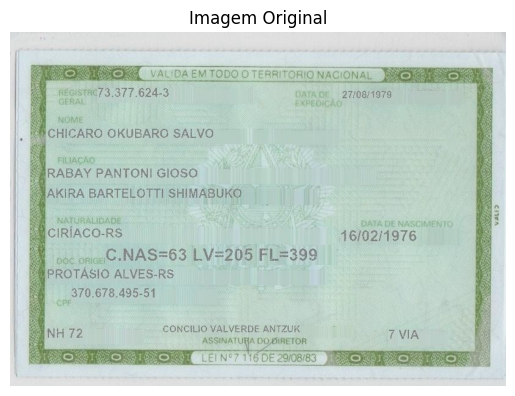

In [56]:
# 000254141_in.jpg
# 000111111_in.jpg
# 022229888_in.jpg
# 000233025_in.jpg -> Normal
# 000233331_in.jpg -> Normal
# 000250001_in.jpg -> Normal
# 000250002_in.jpg -> Normal
# 000259281_in.jpg -> Normal

# Carregar a imagem
image_path = os.path.join('..','assets', 'documentos-pessoais', 'rg', 'verso', '000233025_in.jpg')
image = cv2.imread(image_path)

lab= cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
l_channel, a, b = cv2.split(lab)

# Applying CLAHE to L-channel
# feel free to try different values for the limit and grid size:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(l_channel)

# merge the CLAHE enhanced L-channel with the a and b channel
limg = cv2.merge((cl,a,b))

# Converting image from LAB Color model to BGR color spcae
enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)


adjusted = cv2.convertScaleAbs(image, alpha=.75, beta=1.5)

# Exibir a imagem carregada
show_image(image, 'Imagem Original')
#print(os.path.isdir(os.path.join('..', 'assets')))

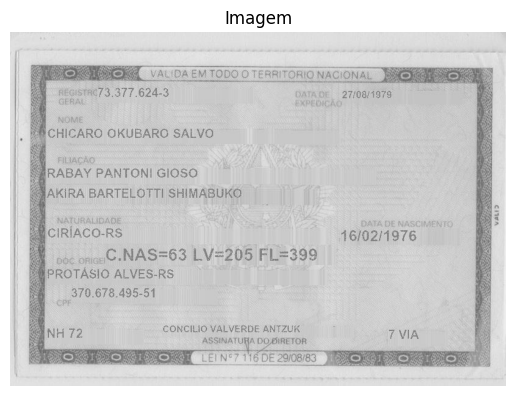

In [57]:
# Passo 1: Leitura da imagem em escala de cinza
imagem_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Passo 2: Conversão para imagem BGR
imagem_bgr = cv2.cvtColor(imagem_gray, cv2.COLOR_GRAY2BGR)

# Passo 3: Conversão para o espaço de cor HSV
imagem_hsv = cv2.cvtColor(imagem_bgr, cv2.COLOR_BGR2HSV)

# Passo 4: Aumento da saturação
# Pegue o canal de saturação (S)
h, s, v = cv2.split(imagem_hsv)
# Aumente a saturação (por exemplo, multiplicando por 2, com cuidado para não estourar os valores máximos de 255)
s = cv2.multiply(s, 10)
s = np.clip(s, 0, 255)  # Certifique-se de que os valores estejam no intervalo [0, 255]

# Recombine os canais
imagem_hsv_mod = cv2.merge([h, s, v])

# Passo 5: Conversão de volta para BGR
imagem_bgr_mod = cv2.cvtColor(imagem_hsv_mod, cv2.COLOR_HSV2BGR)

# Passo 6: Exibição ou salvamento da imagem resultante
show_image(imagem_bgr_mod)

In [9]:
# Inicializar o leitor EasyOCR
reader = easyocr.Reader(['pt'])  # Pode adicionar mais idiomas se necessário

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [58]:
# Executar OCR na imagem
results = reader.readtext(imagem_bgr_mod)

In [59]:
# Mostrar resultados
for (bbox, text, prob) in results:
    # Desenhar bounding box ao redor do texto detectado
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    top_right = tuple(map(int, top_right))
    bottom_right = tuple(map(int, bottom_right))
    bottom_left = tuple(map(int, bottom_left))

    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(image, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    print(f'Texto: {text}, Probabilidade: {prob:.2f}, Box: {bbox}')


# Texto: REGISTRC73.377.624-3, Probabilidade: 0.43, Box: [[78, 88], [264, 88], [264, 112], [78, 112]]
# Texto: CHICARO OKUBARO SALVO, Probabilidade: 0.94, Box: [[58, 154], [336, 154], [336, 180], [58, 180]]
# Texto: 16/02/1976, Probabilidade: 1.00, Box: [[538, 320], [672, 320], [672, 350], [538, 350]]
# Texto: 370.678.495-51, Probabilidade: 0.92, Box: [[96, 414], [242, 414], [242, 440], [96, 440]]

# Texto: 84.941.430-1, Probabilidade: 0.92, Box: [[210, 92], [350, 92], [350, 118], [210, 118]]
# Texto: HOCHUN CERDEIRA CREMA, Probabilidade: 0.93, Box: [[112, 170], [498, 170], [498, 200], [112, 200]]
# Texto: 20/11/2008, Probabilidade: 1.00, Box: [[722, 364], [838, 364], [838, 390], [722, 390]]


Texto: VALDA EMTODO O TEBRITORIO NACIONAL, Probabilidade: 0.52, Box: [[228, 58], [596, 58], [596, 84], [228, 84]]
Texto: REGISTRC73.377.624-3, Probabilidade: 0.43, Box: [[78, 88], [264, 88], [264, 112], [78, 112]]
Texto: Daia Oe, Probabilidade: 0.16, Box: [[467, 97], [525, 97], [525, 113], [467, 113]]
Texto: 27/08/1879, Probabilidade: 0.47, Box: [[541, 93], [629, 93], [629, 113], [541, 113]]
Texto: Ge8at, Probabilidade: 0.17, Box: [[79, 107], [125, 107], [125, 123], [79, 123]]
Texto: FxeFoIÇ Ko, Probabilidade: 0.03, Box: [[464, 107], [547, 107], [547, 128], [464, 128]]
Texto: NoME, Probabilidade: 0.39, Box: [[77, 139], [123, 139], [123, 153], [77, 153]]
Texto: CHICARO OKUBARO SALVO, Probabilidade: 0.94, Box: [[58, 154], [336, 154], [336, 180], [58, 180]]
Texto: FilAcao, Probabilidade: 0.28, Box: [[77, 205], [143, 205], [143, 221], [77, 221]]
Texto: RABAY PANTONI Gloso, Probabilidade: 0.98, Box: [[58, 220], [310, 220], [310, 244], [58, 244]]
Texto: AKIRA BARTELOTTI SHIMABUKO, Probabilid

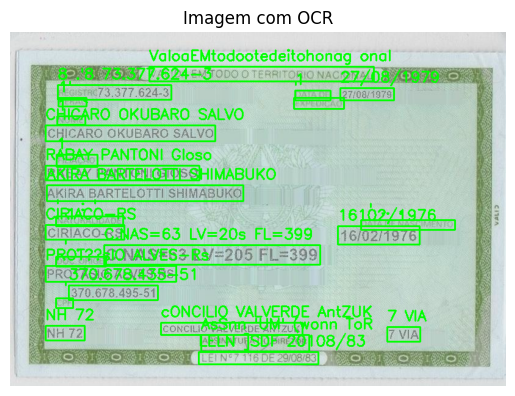

In [12]:
# Exibir imagem com as anotações de OCR
show_image(image, 'Imagem com OCR')

In [97]:
# Se você quiser apenas o texto extraído sem exibir a imagem
extracted_text = [text for (_, text, _) in results]
print("Texto extraído:")
print(" ".join(extracted_text))

Texto extraído:
VALIDAEMTODO O TERRITORIO NACIONAL REGISTRC73,377.624-3 0E 27/08/1879 GERAC SAEDIAO NoMe CHICARO OKUBARO SALVO FiLIACAO RABAY PANTONI Gloso AKIRA BARTELOTTI SHIMABUKO NATUAAUDAOE DaTade NASCIMENTO CIRÍACO-RS 16/02/1976 DoC ORIGE C.NAS=63 LV-205 FL=399 PROTÁSIO ALVES-RS 370.678.495-51 CPF NH 72 CONCILIO VALVERDE ANTZUK VIA ASSINATUHA Do DiReTOR LEINª 7 116 DE 29108/83
